# Necessary Information of dataset

Survival: Survival (0 = No; 1 = Yes)

Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Name : Name

Sex : Sex

Age : Age

Sibsp : Number of Siblings/Spouses Aboard

Parch : Number of Parents/Children Aboard

Ticket : Ticket Number

Fare : Passenger Fare

Cabin : Cabin Number

Embarked : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.shape[0]

891

In [5]:
train_df.isnull().sum() #this shows the total null values in a particular column.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

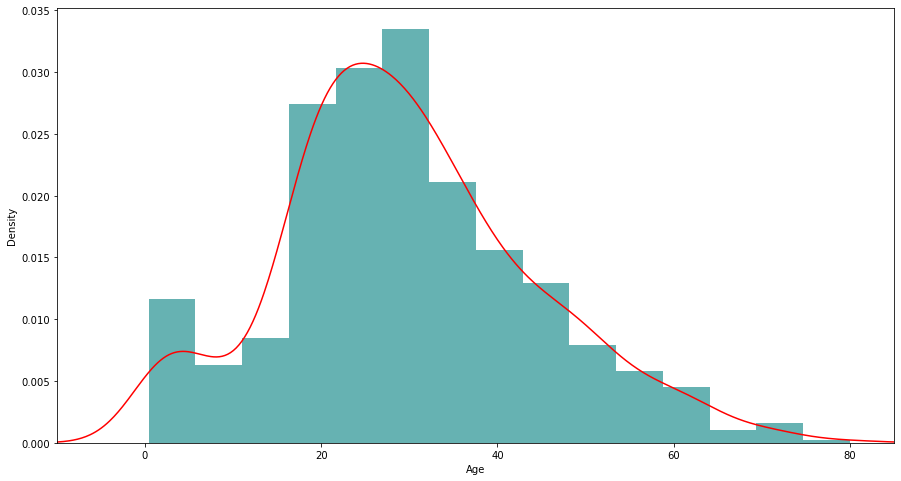

In [7]:
plt.figure(figsize=(15,8))
ax =train_df['Age'].hist(bins=15, density=True, stacked=True,color='teal',alpha=0.6)#alpha is the amount of transparency between 0 and 1
train_df['Age'].plot(kind="density", color='red')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show

In [8]:
train_df['Age'].mean()

29.69911764705882

In [9]:
train_df['Age'].median()

28.0

S    644
C    168
Q     77
Name: Embarked, dtype: int64


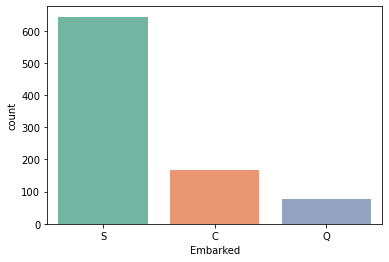

In [10]:
print(train_df['Embarked'].value_counts()) #embarked means the place from where took the ship.
sns.countplot(x='Embarked',data=train_df, palette='Set2')
plt.show()

<b> Refining dataset by removing null values with meadian of the data </b>

In [11]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)#this function is filing the null values with median.
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)                  

In [12]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


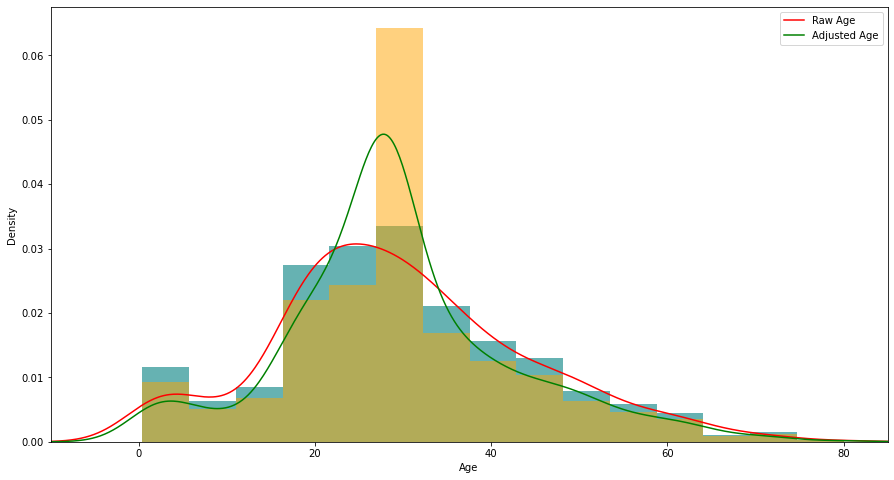

In [14]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='red')

ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='green')

ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [15]:
train_data.head()#just for checking i checked because inplace was creating a problem basically with inplace we only need to run the cell once if you will run cell again it will give you error then you need re-run the kernel or run the code from above.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
train_data['Travel Alone'] = np.where((train_data["SibSp"]+train_data["Parch"])>0,0,1)#basically in this cell where function is checking if the person is travelling with any siblings or parents
train_data.drop('SibSp',axis=1, inplace=True)                                        #then it will return true else false hence forming a column travel alone with true false values - (0,1)
train_data.drop('Parch',axis=1, inplace=True)

In [17]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Travel Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [18]:
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)
training.drop('Pclass_3', axis=1, inplace=True)#dropping this because if other 2 classes are 0 then it automatically indicates that Pclass_3 is 1 
training.drop('Embarked_C', axis=1, inplace=True)  #same reason above 

final_train = training
final_train.head()

,Survived,Age,Fare,Travel Alone,Pclass_1,Pclass_2,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,0,0
2,1,26.0,7.9250,1,0,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,1,0
4,0,35.0,8.0500,1,0,0,0,1,1


In [19]:
set(train_data['Pclass'])

{1, 2, 3}

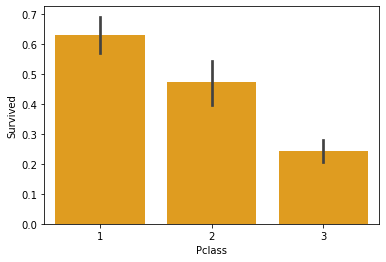

In [58]:
sns.barplot(x='Pclass',y='Survived', data=train_df, color='orange')
plt.show()

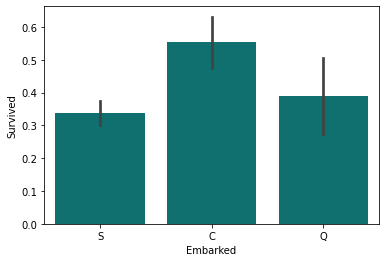

In [57]:
sns.barplot(x='Embarked',y='Survived',data=train_data, color='teal')
plt.show()

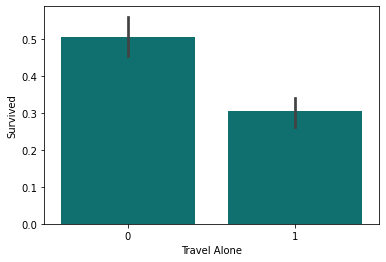

In [56]:
sns.barplot(x = 'Travel Alone',y = 'Survived',data=train_data, color='teal')
plt.show()

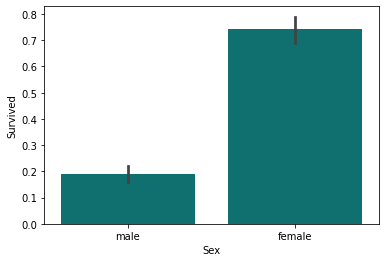

In [55]:
sns.barplot(x ='Sex',y ='Survived',data=train_data, color='teal')
plt.show()

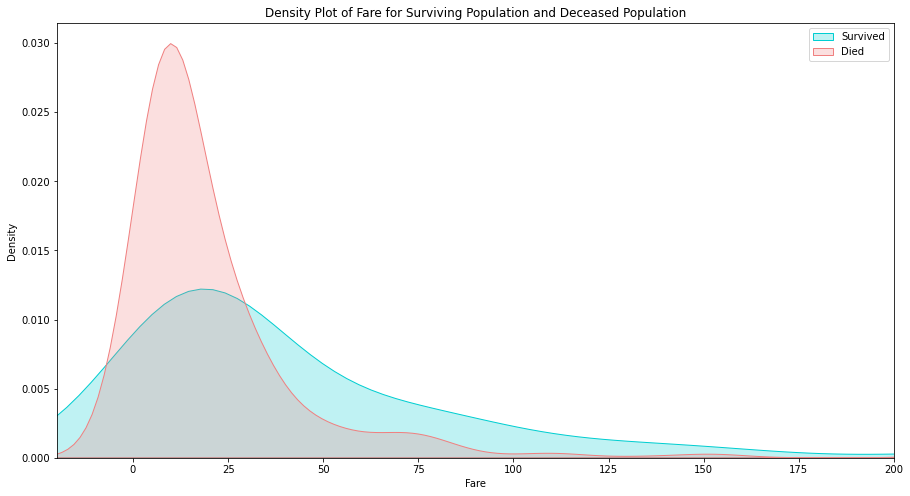

In [24]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

# Preprocessing for train/test/split

In [33]:
X = np.asarray(final_train[['Age', 'Fare', 'Travel Alone', 'Pclass_1', 'Pclass_2', 'Embarked_Q', 'Embarked_S','Sex_male']])
X[0:5]

array([[22.    ,  7.25  ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ,
         1.    ],
       [38.    , 71.2833,  0.    ,  1.    ,  0.    ,  0.    ,  0.    ,
         0.    ],
       [26.    ,  7.925 ,  1.    ,  0.    ,  0.    ,  0.    ,  1.    ,
         0.    ],
       [35.    , 53.1   ,  0.    ,  1.    ,  0.    ,  0.    ,  1.    ,
         0.    ],
       [35.    ,  8.05  ,  1.    ,  0.    ,  0.    ,  0.    ,  1.    ,
         1.    ]])

In [34]:
y = np.asarray(final_train[['Survived']]).ravel()
y[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [35]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.56573646, -0.50244517, -1.2316449 , -0.56568542, -0.51015154,
        -0.30756234,  0.61583843,  0.73769513],
       [ 0.66386103,  0.78684529, -1.2316449 ,  1.76776695, -0.51015154,
        -0.30756234, -1.62380254, -1.35557354],
       [-0.25833709, -0.48885426,  0.81192233, -0.56568542, -0.51015154,
        -0.30756234,  0.61583843, -1.35557354],
       [ 0.4333115 ,  0.42073024, -1.2316449 ,  1.76776695, -0.51015154,
        -0.30756234,  0.61583843, -1.35557354],
       [ 0.4333115 , -0.48633742,  0.81192233, -0.56568542, -0.51015154,
        -0.30756234,  0.61583843,  0.73769513]])

# train/test/split

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 8) (712,)
Test set: (179, 8) (179,)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
model = LogisticRegression(solver='liblinear').fit(X_train,y_train)
model

LogisticRegression(solver='liblinear')

In [38]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [39]:
y_prob = model.predict_proba(X_test)
y_prob

array([[0.89375692, 0.10624308],
       [0.89648819, 0.10351181],
       [0.34538492, 0.65461508],
       [0.09252771, 0.90747229],
       [0.86371889, 0.13628111],
       [0.56214593, 0.43785407],
       [0.11503067, 0.88496933],
       [0.34499235, 0.65500765],
       [0.60996671, 0.39003329],
       [0.87023585, 0.12976415],
       [0.91705136, 0.08294864],
       [0.72427681, 0.27572319],
       [0.20796382, 0.79203618],
       [0.9214104 , 0.0785896 ],
       [0.12318146, 0.87681854],
       [0.69022832, 0.30977168],
       [0.92373665, 0.07626335],
       [0.32683122, 0.67316878],
       [0.88477946, 0.11522054],
       [0.10365488, 0.89634512],
       [0.83192559, 0.16807441],
       [0.87832537, 0.12167463],
       [0.8716836 , 0.1283164 ],
       [0.87163451, 0.12836549],
       [0.18826192, 0.81173808],
       [0.37293621, 0.62706379],
       [0.06235699, 0.93764301],
       [0.05700091, 0.94299909],
       [0.91705903, 0.08294097],
       [0.90209446, 0.09790554],
       [0.

# Accuracy evaluation

<b> Jaccard Index</b>

In [40]:
from sklearn.metrics import jaccard_score
J1=jaccard_score(y_test,y_pred)
J1

0.5616438356164384

<b> Confusion matrix </b>

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
          print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[ 41  19]
 [ 13 106]]


Confusion matrix, without normalization
[[ 41  19]
 [ 13 106]]


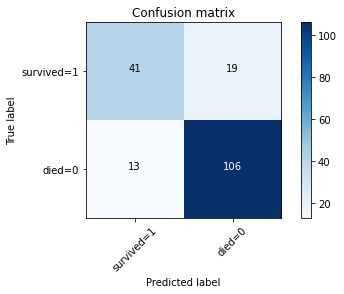

In [42]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['survived=1','died=0'],normalize= False,  title='Confusion matrix')

In [43]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       119
           1       0.76      0.68      0.72        60

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.82      0.82      0.82       179



<b> log loss </b>

In [44]:
from sklearn.metrics import log_loss
l1=log_loss(y_test, y_prob)
l1

0.4114886689764943

In [45]:
#modelx = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
#y_probx = modelx.predict_proba(X_test)
#log_loss(y_test, y_probx)   #just for trying normalization

In [46]:
model2 = LogisticRegression(solver='sag').fit(X_train,y_train)
y_prob2 = model2.predict_proba(X_test)
l2=log_loss(y_test, y_prob2)
l2

0.41141558983436316

In [47]:
model3 = LogisticRegression( solver='saga').fit(X_train,y_train)
y_prob3 = model3.predict_proba(X_test)
l3=log_loss(y_test, y_prob3)
l3

0.4114155907422119

In [48]:
model4 = LogisticRegression( solver='newton-cg').fit(X_train,y_train)
y_prob4 = model4.predict_proba(X_test)
l4=log_loss(y_test, y_prob4)
l4

0.4114158080831212

In [49]:
model5 = LogisticRegression( solver='lbfgs').fit(X_train,y_train)
y_prob5 = model5.predict_proba(X_test)
l5=log_loss(y_test, y_prob5)
l5

0.4114155220176914

In [50]:
#preparing jaccard score for other models

y_pred2 = model2.predict(X_test)
J2=jaccard_score(y_test,y_pred2)

y_pred3 = model3.predict(X_test)
J3=jaccard_score(y_test,y_pred3)

y_pred4 = model4.predict(X_test)
J4=jaccard_score(y_test,y_pred4)

y_pred5 = model5.predict(X_test)
J5=jaccard_score(y_test,y_pred5)

In [51]:
accuracy_table = {'model' : [J1,l1],
                                'model2': [J2,l2],
                                'model3': [J3,l3],
                                'model4': [J4,l4],
                                'model5': [J5,l5]
                                }

df = pd.DataFrame(accuracy_table, columns = ['model','model2','model3','model4','model5'], index=['Jaccard Score','Log loss'])
print (df)

                  model    model2    model3    model4    model5
Jaccard Score  0.561644  0.561644  0.561644  0.561644  0.561644
Log loss       0.411489  0.411416  0.411416  0.411416  0.411416


Jaccard Score is good closest to 1 and log loss is good closest to 0 for a model. <br>
Hence model 2,4,5 are best model lets try these on test.csv